In [2]:
import numpy
numpy.testing.Tester = 0

import alchemlyb
import glob, os
import numpy as np
import pandas as pd
from alchemlyb.estimators import TI,MBAR,BAR
from alchemlyb.parsing.gmx import extract_u_nk,extract_dHdl
import matplotlib.pyplot as plt
from alchemlyb.visualisation import plot_mbar_overlap_matrix,plot_ti_dhdl

from mult_fidelity_free_energy.MFTI import MFTI

In [3]:
def read_dHdl_xvg(path,T):
    paths = glob.glob(path)
    p = np.argsort( [ int(pp.split(".")[-2] ) for pp in paths] )
    xvgs = np.array(paths)[p]

    return alchemlyb.concat([ extract_dHdl(xvg, T=T) for xvg in xvgs ])

def read_u_nk_xvg(path,T):
    paths = glob.glob(path)
    p = np.argsort( [ int(pp.split(".")[-2] ) for pp in paths] )
    xvgs = np.array(paths)[p]

    return alchemlyb.concat([ extract_u_nk(xvg, T=T) for xvg in xvgs ])


def reverse_plot(revs, time, labels, ref=None, savepath="",
                colors=["orange","green","magenta"]):
    msize=12
    fsize=15
    ffsize=20
    alpha=0.3
    lsize = 4      
    fig, ax = plt.subplots()
    for i,rev in enumerate(revs):
        ax.errorbar( time, rev[0], xerr=rev[1],
                 marker=".",markersize=msize,linewidth=lsize,
                 label=labels[i], color=colors[i])
        ax.errorbar( time, rev[2], xerr=rev[3],
                 marker=".",markersize=msize,linewidth=lsize,
                color=colors[i])
    if ref:
        plt.plot( time, np.ones(time.shape)*ref ,"-",color="grey",
                 label="ref",linewidth=lsize, zorder=100) 
    plt.xlim([np.min(time),np.max(time)])
    plt.ylabel(r"$\Delta$G", fontsize=ffsize)
    plt.xlabel( "time / ns", fontsize=ffsize-4)
    plt.legend(frameon=False, fontsize=fsize)
    plt.xticks(fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.legend(fontsize=fsize,frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
    if savepath:
        plt.savefig(savepath+".png", bbox_inches='tight')
        plt.savefig(savepath+".pdf", bbox_inches='tight')
    plt.show()
    plt.close()
    return

def drop_dHdl(dHdl,idx):
    drp = np.unique( dHdl.index.get_level_values('vdw-lambda') )[idx]
    xx = dHdl.drop( index=drp,level=3)   
    return xx

def drop_u_nk(u_nk,idx):
    drp = np.unique( u_nk.index.get_level_values('vdw-lambda') )[idx]
    xx = u_nk.drop( index=drp,level=3)   
    #for dd in drp:
    #    dummy = np.array([np.array( aa )[2] for aa in np.array( xx.columns ) ])
    #    p = np.where(dummy != dd)
    #    xx = xx[ xx.columns[p] ] 
    return xx

In [4]:
T=313.15

path_pep = "example/peptide/pep.dhdl.*.xvg"
path_pro = "example/protein/dhdl.*.xvg"
drps = [None,
        ]

path_peps = [path_pep]
path_pros = [path_pro]

folder = ""


#os.makedirs(folder, exist_ok=True)


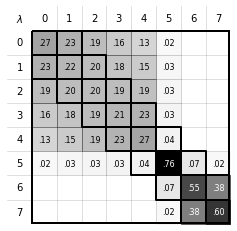

new time
t0 7500.0
mass-lambda


 /home/derwer/.local/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


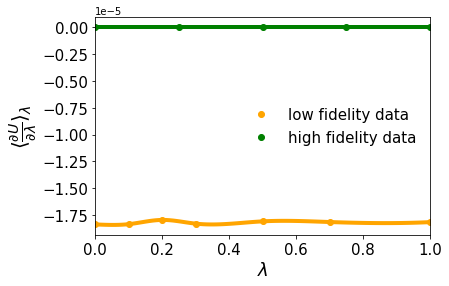

coul-lambda


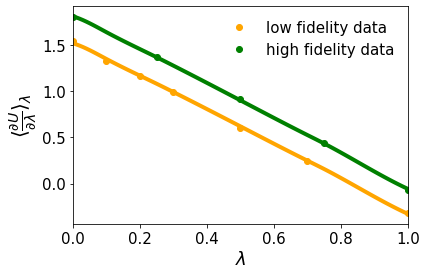

vdw-lambda


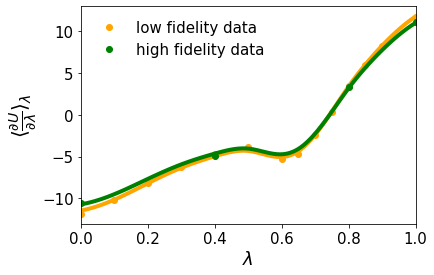

bonded-lambda
passed cause empty bonded-lambda
restraint-lambda
passed cause empty restraint-lambda
mass-lambda


 /home/derwer/.local/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


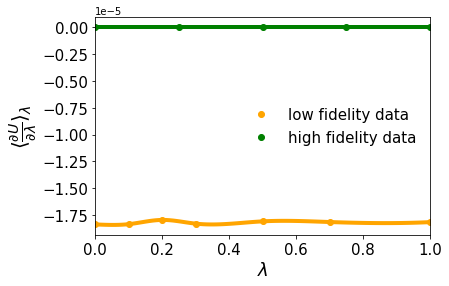

coul-lambda


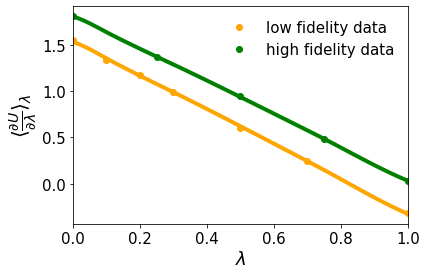

vdw-lambda


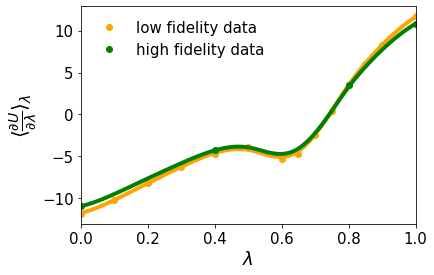

bonded-lambda
passed cause empty bonded-lambda
restraint-lambda
passed cause empty restraint-lambda


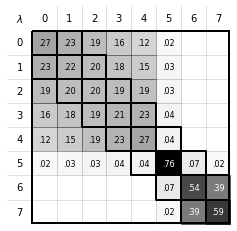

new time
t0 15000.0
mass-lambda


 /home/derwer/.local/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


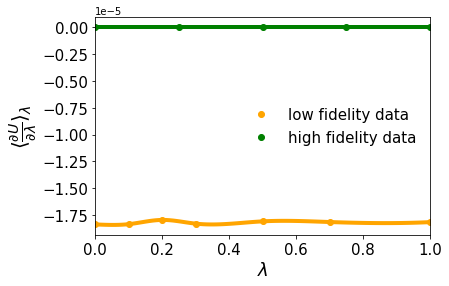

coul-lambda


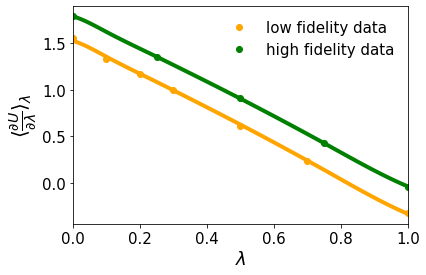

vdw-lambda


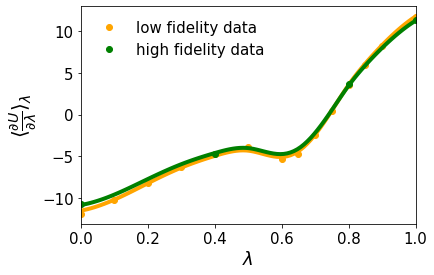

bonded-lambda
passed cause empty bonded-lambda
restraint-lambda
passed cause empty restraint-lambda
mass-lambda


 /home/derwer/.local/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


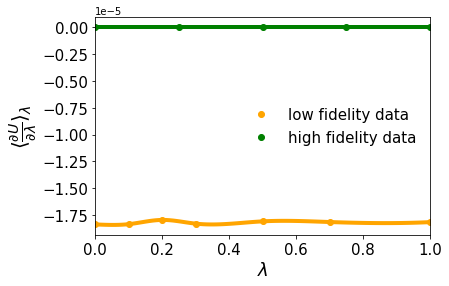

coul-lambda


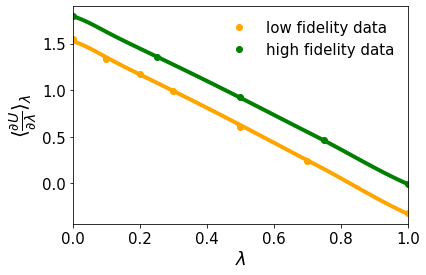

vdw-lambda


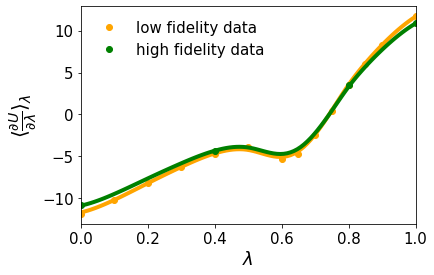

bonded-lambda
passed cause empty bonded-lambda
restraint-lambda
passed cause empty restraint-lambda


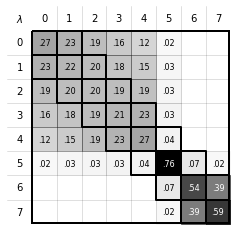

new time
t0 22500.0
mass-lambda


 /home/derwer/.local/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


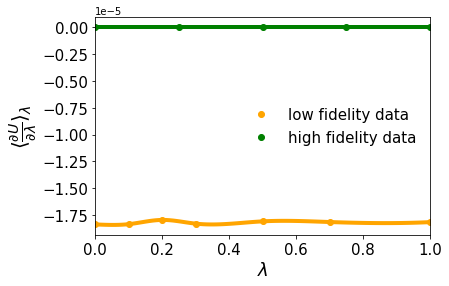

coul-lambda


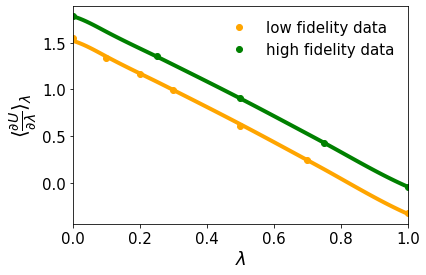

vdw-lambda


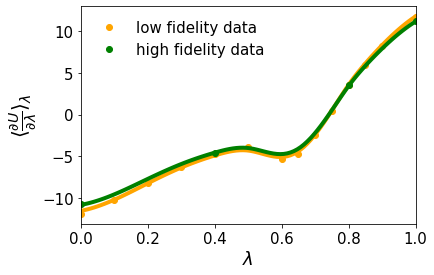

bonded-lambda
passed cause empty bonded-lambda
restraint-lambda
passed cause empty restraint-lambda
mass-lambda


 /home/derwer/.local/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


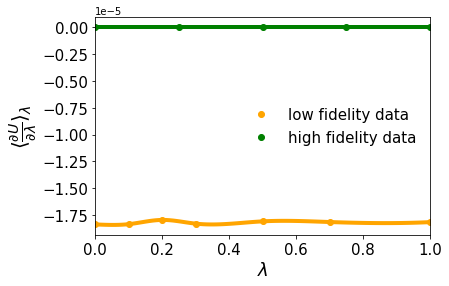

coul-lambda


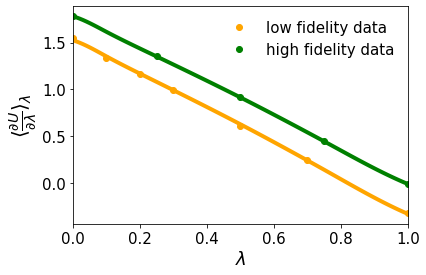

vdw-lambda


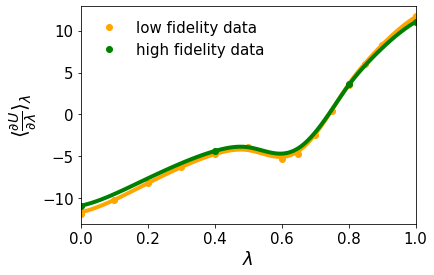

bonded-lambda
passed cause empty bonded-lambda
restraint-lambda
passed cause empty restraint-lambda


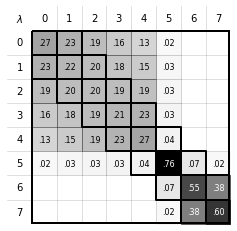

new time
t0 30000.0
mass-lambda


 /home/derwer/.local/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


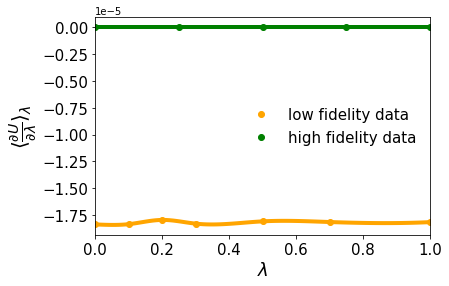

coul-lambda


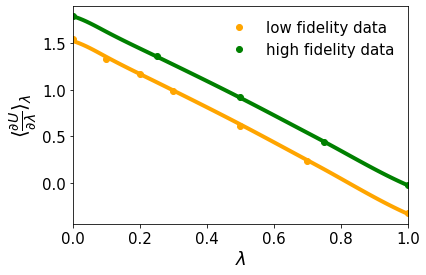

vdw-lambda


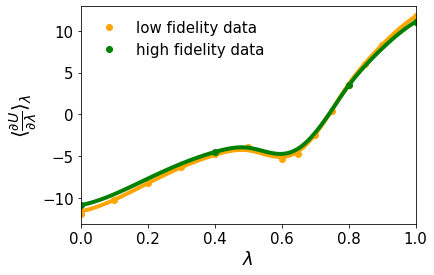

bonded-lambda
passed cause empty bonded-lambda
restraint-lambda
passed cause empty restraint-lambda
mass-lambda


 /home/derwer/.local/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


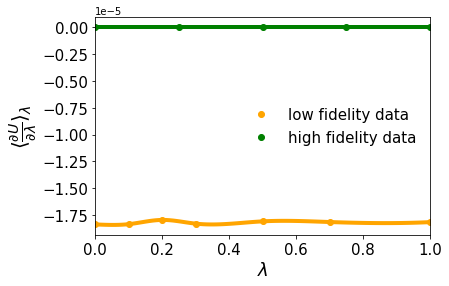

coul-lambda


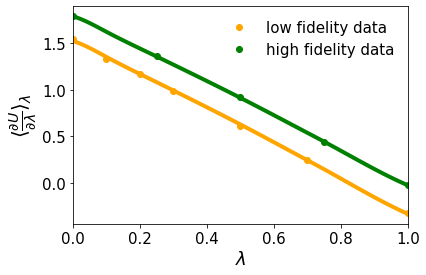

vdw-lambda


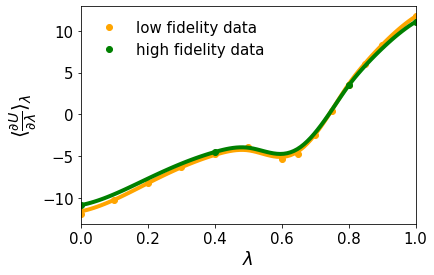

bonded-lambda
passed cause empty bonded-lambda
restraint-lambda
passed cause empty restraint-lambda


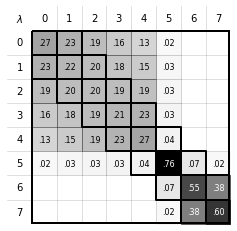

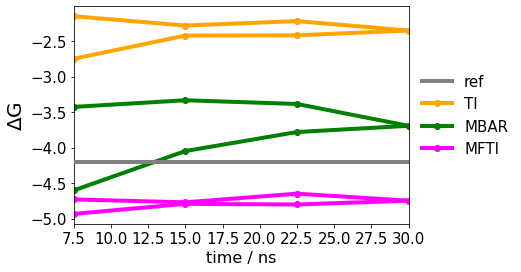

In [5]:
for path_pep,path_pro in zip(path_peps,path_pros):
    
    path = folder + path_pro.split("/")[0]+ "/"
    os.makedirs(path, exist_ok=True)
    
    dHdl_pep_full = read_dHdl_xvg(path_pep,T)
    dHdl_pro_full = read_dHdl_xvg(path_pro,T)
    u_nk_pro_full = read_u_nk_xvg(path_pro,T)    

    dHdl_pep  = dHdl_pep_full
    dHdl_pro0 = dHdl_pro_full    
    u_nk_pro0 = u_nk_pro_full
    
    time = np.unique( dHdl_pro0.index.get_level_values(0) )
    tt = np.linspace(0,np.max(time),5)    
    
    mbar_ref = MBAR().fit(u_nk_pro0)
    dG_mbar_ref = round(np.array(alchemlyb.postprocessors.units.to_kJmol( mbar_ref.delta_f_ ) )[0][-1],4)
    ax = plot_mbar_overlap_matrix(mbar_ref.overlap_matrix)
    ax.figure.savefig(path+'overlap_ref.pdf')
    ax.figure.savefig(path+'overlap_ref.png')
    plt.show()
    plt.close()

    for i,idrp in enumerate(drps):
        if i>0:
            lambda_len = len( idrp )
            dHdl_pro = drop_dHdl(dHdl_pro0,idrp)
            u_nk_pro = drop_u_nk(u_nk_pro0,idrp)
        else:
            lambda_len = "full"
            dHdl_pro = dHdl_pro0
            u_nk_pro = u_nk_pro0           
    
        mfti_dGs     = []
        mfti_dGs_rev = []
        dmfti_dGs     = []
        dmfti_dGs_rev = []
        ti_dGs     = []
        ti_dGs_rev = []
        dti_dGs     = []
        dti_dGs_rev = []
        mbar_dGs     = []
        mbar_dGs_rev = []
        dmbar_dGs     = []
        dmbar_dGs_rev = []    
        for t0,t1 in zip( tt[1:],tt[:-1][::-1] ):
            print("new time")
            print("t0", t0)
            
            savepath0 = path + "_".join([str(int(t0)),str(lambda_len),str(i) ])
            os.makedirs(savepath0, exist_ok=True)
            savepath = savepath0+"/xxx"
            
            drp0 = time[ time > t0 ]
            dHdl_pro_dummy0 = dHdl_pro.drop( index=drp0,level=0)
            drp1 = time[ time <= t1 ]
            dHdl_pro_dummy1 = dHdl_pro.drop( index=drp1,level=0)

            u_nk_pro_dummy0 = u_nk_pro.drop( index=drp0,level=0)
            u_nk_pro_dummy1 = u_nk_pro.drop( index=drp1,level=0)        

            dHdl_pep['fidelity'] = 0
            dHdl_pro_f0 = dHdl_pro_dummy0.copy()
            dHdl_pro_f0['fidelity'] = 1
            dHdl_pro_f1 = dHdl_pro_dummy1.copy()
            dHdl_pro_f1['fidelity'] = 1    

            frames0 = [dHdl_pro_f0, dHdl_pep]
            frames1 = [dHdl_pro_f1, dHdl_pep]
            dHdl0 = pd.concat(frames0).set_index('fidelity', append=True)
            dHdl1 = pd.concat(frames1).set_index('fidelity', append=True)

            ti0 = TI().fit(dHdl_pro_dummy0) #.drop("fidelity", axis=1))
            ti1 = TI().fit(dHdl_pro_dummy1) #.drop("fidelity", axis=1))
            ti_dGs.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( ti0.delta_f_ ) )[0][-1],4) )
            ti_dGs_rev.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( ti1.delta_f_ ) )[0][-1],4) )
            dti_dGs.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( ti0.d_delta_f_ ) )[0][-1],4) )
            dti_dGs_rev.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( ti1.d_delta_f_ ) )[0][-1],4) )

            mfti0 = MFTI(savepath=savepath0).fit(dHdl0)
            mfti1 = MFTI(savepath=savepath0).fit(dHdl1)
            mfti_dGs.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( mfti0.delta_f_ ) )[0][-1],4) )
            mfti_dGs_rev.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( mfti1.delta_f_ ) )[0][-1],4) )
            dmfti_dGs.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( mfti0.d_delta_f_ ) )[0][-1],4) )
            dmfti_dGs_rev.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( mfti1.d_delta_f_ ) )[0][-1],4) )

            mbar0 = MBAR().fit(u_nk_pro_dummy0)
            mbar1 = MBAR().fit(u_nk_pro_dummy1)
            ax = plot_mbar_overlap_matrix(mbar0.overlap_matrix)
            ax.figure.savefig(savepath.replace("xxx","overlap")+'.pdf')
            ax.figure.savefig(savepath.replace("xxx","overlap")+'.png')
            plt.show()
            plt.close()
            #ax = plot_mbar_overlap_matrix(mbar1.overlap_matrix)
            mbar_dGs.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( mbar0.delta_f_ ) )[0][-1],4) )
            mbar_dGs_rev.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( mbar1.delta_f_ ) )[0][-1],4) )
            dmbar_dGs.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( mbar0.d_delta_f_ ) )[0][-1],4) )
            dmbar_dGs_rev.append( round(np.array(alchemlyb.postprocessors.units.to_kJmol( mbar1.d_delta_f_ ) )[0][-1],4) )

            #break

        revs = [ (ti_dGs, dti_dGs, ti_dGs_rev, dti_dGs_rev), 
                 (mbar_dGs, dmbar_dGs, mbar_dGs_rev, dmbar_dGs_rev),
                 (mfti_dGs, dmfti_dGs, mfti_dGs_rev, dmfti_dGs_rev),
               ]
        labels = ["TI","MBAR","MFTI"]
        reverse_plot( revs, tt[1:]/1000, labels, ref=-4.2, savepath=savepath.replace("xxx","dG_t") )        
        
        
        

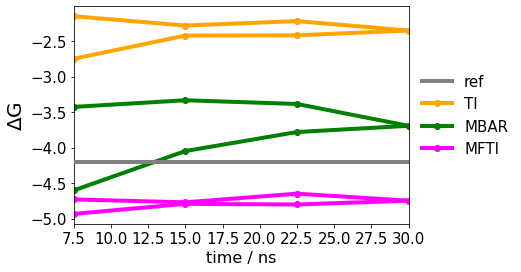

In [6]:
reverse_plot( revs, tt[1:]/1000, labels, ref=-4.2, savepath=savepath.replace("xxx","dG_t") )  